In [3]:
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
#import coremltools

from scipy import stats
from IPython.display import display, HTML
import os
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D, LSTM, ConvLSTM2D
from keras.utils import np_utils

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
import zipfile
with zipfile.ZipFile('E:/New folder (2)/wisdm-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('E:/New folder (2)/content/')

# **Data reading**

### **Phone and Watch Accelerometer data : Train/test**

Note :
The WISDM dataset should me in the same folder as this notebook so all the scripts will work succefully

In [5]:
columns=['user','activity','time','x','y','z']

# Phone accel dataset importation
data_phone_accel_all = pd.DataFrame(data=None,columns=columns)
print("Reading Phone Accel data ...")
for dirname, _, filenames in os.walk(r'E:/New folder (2)/content/wisdm-dataset/raw/phone/accel'):
    for filename in filenames[1:]:
        if filename.endswith('.txt'):
            df = pd.read_csv(f"E:/New folder (2)/content/wisdm-dataset/raw/phone/accel/{filename}" , sep=",", header=None)
            temp=pd.DataFrame(data=df.values, columns=columns)
            data_phone_accel_all=pd.concat([data_phone_accel_all,temp])
# Make all the data in an appropriate format
data_phone_accel_all['z'] = data_phone_accel_all['z'].str.replace(';','')
data_phone_accel_all['activity'].value_counts()
data_phone_accel_all['x']=data_phone_accel_all['x'].astype('float')
data_phone_accel_all['y']=data_phone_accel_all['y'].astype('float')
data_phone_accel_all['z']=data_phone_accel_all['z'].astype('float')


# Watch accel dataset importation
data_watch_accel_all = pd.DataFrame(data=None,columns=columns)
print("\nReading Watch Accel data ...")
for dirname, _, filenames in os.walk(r'E:/New folder (2)/content/wisdm-dataset/raw/watch/accel'):
    for filename in filenames[1:]:
        if(filename.endswith('.txt')):
            df = pd.read_csv(f'E:/New folder (2)/content/wisdm-dataset/raw/watch/accel/{filename}' , sep=",", header=None)
            temp=pd.DataFrame(data=df.values, columns=columns)
            data_watch_accel_all=pd.concat([data_watch_accel_all,temp])
# Make all the data in an appropriate format
data_watch_accel_all['z'] = data_watch_accel_all['z'].str.replace(';','')
data_watch_accel_all['x']=data_watch_accel_all['x'].astype('float')
data_watch_accel_all['y']=data_watch_accel_all['y'].astype('float')
data_watch_accel_all['z']=data_watch_accel_all['z'].astype('float')

Reading Phone Accel data ...

Reading Watch Accel data ...


In [6]:
data_watch_accel_all['activity'].value_counts()

E    216529
K    215879
Q    215365
D    213018
P    212810
S    211335
A    210495
O    210107
I    210048
M    209491
H    209483
R    208734
G    208720
C    207312
B    205787
F    205137
L    203684
J    203112
Name: activity, dtype: int64

### **Phone and Watch Gyro data : Train/test**

In [7]:
# Phone gyro dataset importation
data_phone_gyro_all = pd.DataFrame(data=None,columns=columns)
print("Reading Phone gyro data ...")
for dirname, _, filenames in os.walk(r'E:/New folder (2)/content/wisdm-dataset/raw/phone/gyro'):
    for filename in filenames[1:]:
        if filename.endswith('.txt'):
            df = pd.read_csv(f"E:/New folder (2)/content/wisdm-dataset/raw/phone/gyro/{filename}" , sep=",", header=None)
            temp=pd.DataFrame(data=df.values, columns=columns)
            data_phone_gyro_all=pd.concat([data_phone_gyro_all,temp])
# Make all the data in an appropriate format
data_phone_gyro_all['z'] = data_phone_gyro_all['z'].str.replace(';','')
data_phone_gyro_all['activity'].value_counts()
data_phone_gyro_all['x']=data_phone_gyro_all['x'].astype('float')
data_phone_gyro_all['y']=data_phone_gyro_all['y'].astype('float')
data_phone_gyro_all['z']=data_phone_gyro_all['z'].astype('float')


# Watch gyro dataset importation
data_watch_gyro_all = pd.DataFrame(data=None,columns=columns)
print("\nReading Watch gyro data ...")
for dirname, _, filenames in os.walk(r'E:/New folder (2)/content/wisdm-dataset/raw/watch/gyro'):
    for filename in filenames[1:]:
        if filename.endswith('.txt'):
            df = pd.read_csv(f'E:/New folder (2)/content/wisdm-dataset/raw/watch/gyro/{filename}' , sep=",", header=None)
            temp=pd.DataFrame(data=df.values, columns=columns)
            data_watch_gyro_all=pd.concat([data_watch_gyro_all,temp])
# Make all the data in an appropriate format
data_watch_gyro_all['z'] = data_watch_gyro_all['z'].str.replace(';','')
data_watch_gyro_all['x']=data_watch_gyro_all['x'].astype('float')
data_watch_gyro_all['y']=data_watch_gyro_all['y'].astype('float')
data_watch_gyro_all['z']=data_watch_gyro_all['z'].astype('float')

Reading Phone gyro data ...

Reading Watch gyro data ...


In [8]:
data_watch_gyro_all.count()


user        3440342
activity    3440342
time        3440342
x           3440342
y           3440342
z           3440342
dtype: int64

In [9]:
data_watch_gyro_all.shape

(3440342, 6)

### **To have a clear idea about our data, these are the activity code signification :**

In [10]:
activity_codes_mapping = {'A': 'walking',
                          'B': 'jogging',
                          'C': 'stairs',
                          'D': 'sitting',
                          'E': 'standing',
                          'F': 'typing',
                          'G': 'brushing teeth',
                          'H': 'eating soup',
                          'I': 'eating chips',
                          'J': 'eating pasta',
                          'K': 'drinking from cup',
                          'L': 'eating sandwich',
                          'M': 'kicking soccer ball',
                          'O': 'playing catch tennis ball',
                          'P': 'dribbling basket ball',
                          'Q': 'writing',
                          'R': 'clapping',
                          'S': 'folding clothes'}

activity_color_map = {activity_codes_mapping['A']: 'lime',
                      activity_codes_mapping['B']: 'red',
                      activity_codes_mapping['C']: 'blue',
                      activity_codes_mapping['D']: 'orange',
                      activity_codes_mapping['E']: 'yellow',
                      activity_codes_mapping['F']: 'lightgreen',
                      activity_codes_mapping['G']: 'greenyellow',
                      activity_codes_mapping['H']: 'magenta',
                      activity_codes_mapping['I']: 'gold',
                      activity_codes_mapping['J']: 'cyan',
                      activity_codes_mapping['K']: 'purple',
                      activity_codes_mapping['L']: 'lightgreen',
                      activity_codes_mapping['M']: 'violet',
                      activity_codes_mapping['O']: 'limegreen',
                      activity_codes_mapping['P']: 'deepskyblue',   
                      activity_codes_mapping['Q']: 'mediumspringgreen',
                      activity_codes_mapping['R']: 'plum',
                      activity_codes_mapping['S']: 'olive'}

### Combining all **Phone's and Watch's** data 

In [11]:
data_phone_accel_all.shape

(4804403, 6)

In [12]:
data_phone_gyro_all.shape

(3608635, 6)

In [13]:
new_columns = ["user_ID","activity_Symbol",'time','x','y','z']
# combinig accel and gyro phone data
df_phone = pd.DataFrame(data=None, columns=new_columns)
df_phone['user_ID']= data_phone_accel_all['user'].head(3608635)
df_phone['activity_Symbol']= data_phone_accel_all['activity'].head(3608635)
df_phone['time']= data_phone_accel_all['time'].head(3608635)
df_phone['x'] = data_phone_gyro_all['x'].values + data_phone_accel_all['x'].head(3608635).values
df_phone['y'] = data_phone_gyro_all['y'].values + data_phone_accel_all['y'].head(3608635).values
df_phone['z'] = data_phone_gyro_all['z'].values + data_phone_accel_all['z'].head(3608635).values

# Combinig accel and gyro watch data
df_watch = pd.DataFrame(data=None, columns=new_columns)
df_watch['user_ID']= data_watch_accel_all['user'].head(3440342)
df_watch['activity_Symbol']= data_watch_accel_all['activity'].head(3440342)
df_watch['time']= data_watch_accel_all['time'].head(3440342)
df_watch['x'] = data_watch_gyro_all['x'].values + data_watch_accel_all['x'].head(3440342).values
df_watch['y'] = data_watch_gyro_all['x'].values + data_watch_accel_all['y'].head(3440342).values
df_watch['z'] = data_watch_gyro_all['x'].values + data_watch_accel_all['z'].head(3440342).values

In [14]:
data_watch_gyro_all.shape

(3440342, 6)

In [15]:
df_phone.shape

(3608635, 6)

In [16]:
df_watch.shape

(3440342, 6)

In [17]:
df_watch.head()

,user_ID,activity_Symbol,time,x,y,z
0,1600,A,90426708196641,7.406569,-0.276723,8.510446
1,1600,A,90426757696641,5.360139,0.229066,7.084114
2,1600,A,90426807196641,3.324719,-0.120837,6.178757
3,1600,A,90426856696641,2.839191,-0.117947,6.035600
4,1600,A,90426906196641,3.843997,-0.978225,7.804156


In [18]:
df_phone.head()

,user_ID,activity_Symbol,time,x,y,z
0,1600,A,252207666810782,-1.217972,9.090729,1.945267
1,1600,A,252207717164786,-1.754868,9.784256,1.179230
2,1600,A,252207767518790,1.281326,11.497559,2.335144
3,1600,A,252207817872794,-0.121017,13.879044,-0.057114
4,1600,A,252207868226798,-2.544846,15.131271,-4.635620


In [19]:
df_watch['activity'] = df_watch['activity_Symbol'].map(activity_codes_mapping)
df_watch = df_watch[['user_ID', 'activity', 'activity_Symbol', 'time', 'x', 'y', 'z']]

df_phone['activity'] = df_phone['activity_Symbol'].map(activity_codes_mapping)
df_phone = df_phone[['user_ID', 'activity', 'activity_Symbol', 'time', 'x', 'y', 'z']]

In [20]:
df_phone.head()

,user_ID,activity,activity_Symbol,time,x,y,z
0,1600,walking,A,252207666810782,-1.217972,9.090729,1.945267
1,1600,walking,A,252207717164786,-1.754868,9.784256,1.179230
2,1600,walking,A,252207767518790,1.281326,11.497559,2.335144
3,1600,walking,A,252207817872794,-0.121017,13.879044,-0.057114
4,1600,walking,A,252207868226798,-2.544846,15.131271,-4.635620


# **Data visualisation**

### For manipulating this data, we need to get to know it better and better, that's when the visualisation play.
### To see how this experience of data collection how accurate with reality, let us visualize both of our usual activitys like :
* ### **Brushing teeth** 
* ### **Walking**

In [21]:
"""
    This function is for plotting each activity for each device and see how 
    the mouvement of x,y and z change over the acceleration during the experience.
"""

def show_accel_per_activity(device, df, act, interval_in_sec = None):
  ''' Plots acceleration time history per activity '''

  df1 = df.loc[df.activity == act].copy()
  df1.reset_index(drop = True, inplace = True)

  df1['duration'] = (df1['time'] - df1['time'].iloc[0])/1000000000 # nanoseconds --> seconds

  if interval_in_sec == None:
    ax = df1[:].plot(kind='line', x='duration', y=['x','y','z'], figsize=(25,7), grid = True) # ,title = act)
  else:
    ax = df1[:interval_in_sec*20].plot(kind='line', x='duration', y=['x','y','z'], figsize=(12,7), grid = True) # ,title = act)

  ax.set_xlabel('duration  (sec)', fontsize = 15)
  ax.set_ylabel('acceleration  (m/sec^2)',fontsize = 15)
  ax.set_title('Acceleration:   Device: ' + device + '      Activity:  ' + act, fontsize = 15)

#### **Brushing teeth and Walking activities using *Phone* :**

c:\Users\DMD-7\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
c:\Users\DMD-7\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


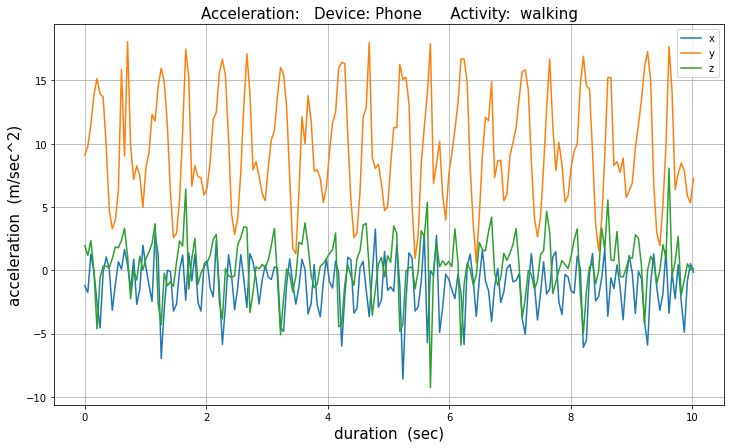

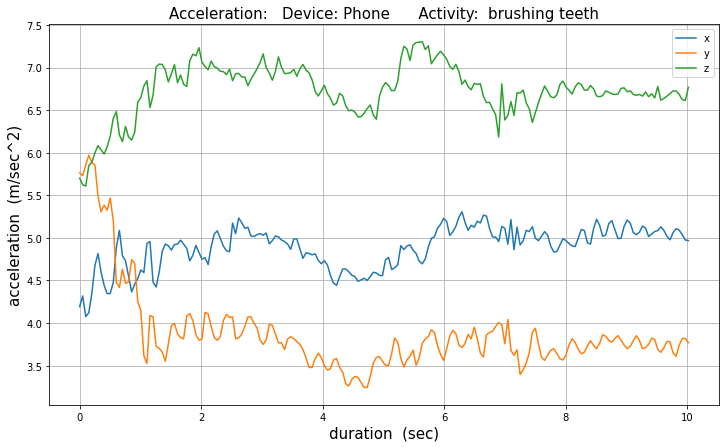

In [22]:
show_accel_per_activity('Phone', df_phone, activity_codes_mapping["A"], 10)
show_accel_per_activity('Phone', df_phone, activity_codes_mapping["G"], 10)

#### **Brushing teeth and Walking activities using *Watch* :**

c:\Users\DMD-7\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
c:\Users\DMD-7\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


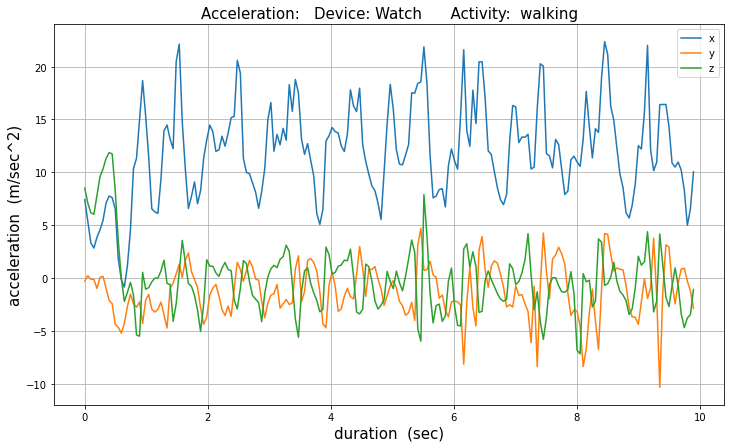

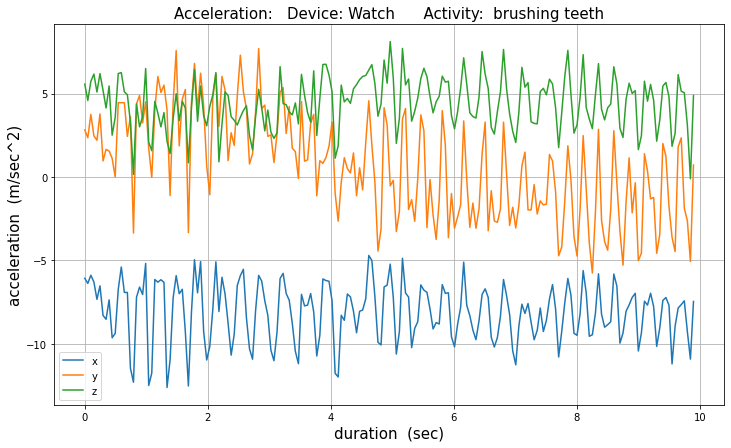

In [23]:
show_accel_per_activity('Watch', df_watch, activity_codes_mapping["A"], 10)
show_accel_per_activity('Watch', df_watch, activity_codes_mapping["G"], 10)

#### The next ploting is to see how many rows we have for each activity : (in the Phone experience)

<AxesSubplot:title={'center':'Rows per activity'}>

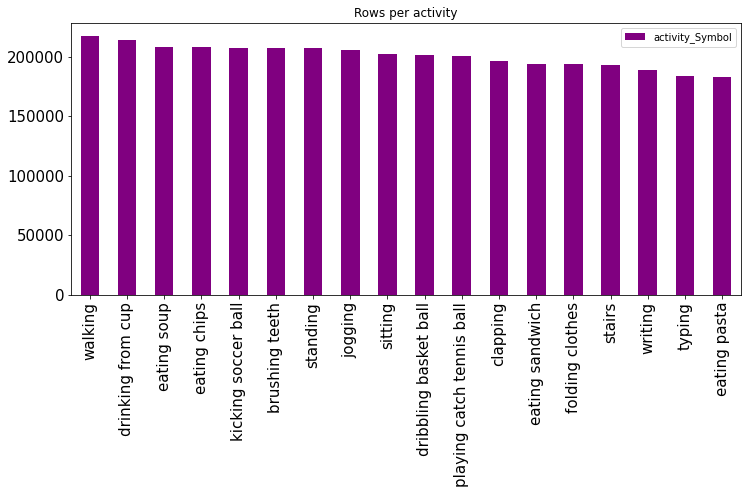

In [24]:
df_phone["activity_Symbol"].map(activity_codes_mapping).value_counts().plot(
                                                                            kind = 'bar', 
                                                                            figsize = (12,5),
                                                                            color = 'purple', 
                                                                            title = 'Rows per activity', 
                                                                            legend = True, 
                                                                            fontsize = 15)

<AxesSubplot:title={'center':'Rows per activity'}>

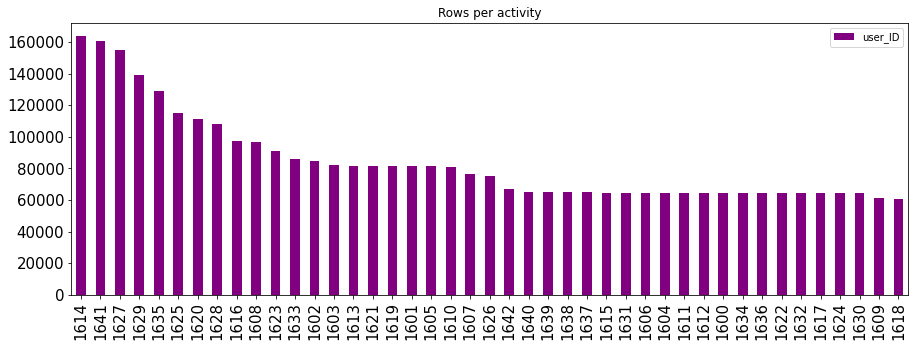

In [25]:
df_phone["user_ID"].value_counts().plot(
                                        kind = 'bar', 
                                        figsize = (15,5), 
                                        color = 'purple', 
                                        title = 'Rows per activity', 
                                        legend = True, 
                                        fontsize = 15)

<AxesSubplot:title={'center':'Rows per activity'}>

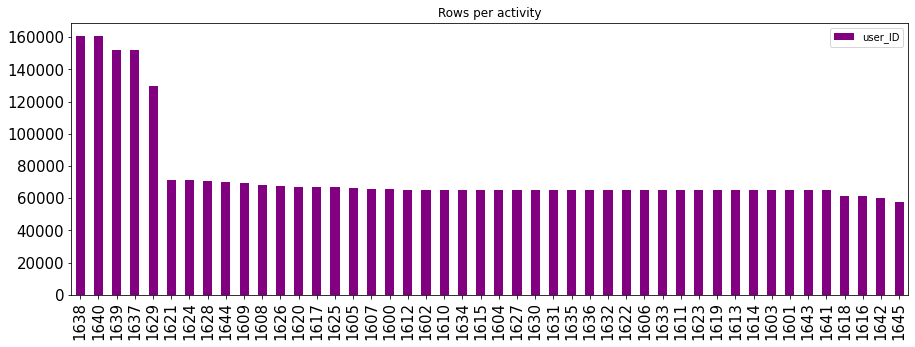

In [26]:
df_watch["user_ID"].value_counts().plot(
                                        kind = 'bar', 
                                        figsize = (15,5), 
                                        color = 'purple', 
                                        title = 'Rows per activity', 
                                        legend = True, 
                                        fontsize = 15)

# **Data pre-processing**

**Dropping the User ID column:**

The approach in this analysis will be to see all the participants as a closed united sample population. The purpose of this analysis is not to inquire the inter participant variability. Also, the participants number is too small to significantly represent the variability of the general population.

Therefore, The User ID column will be dropped:

In [27]:
df_watch.head()

,user_ID,activity,activity_Symbol,time,x,y,z
0,1600,walking,A,90426708196641,7.406569,-0.276723,8.510446
1,1600,walking,A,90426757696641,5.360139,0.229066,7.084114
2,1600,walking,A,90426807196641,3.324719,-0.120837,6.178757
3,1600,walking,A,90426856696641,2.839191,-0.117947,6.035600
4,1600,walking,A,90426906196641,3.843997,-0.978225,7.804156


In [28]:
df_phone.drop('user_ID', axis = 1, inplace = True)
df_phone.drop('activity', axis = 1, inplace = True)

df_watch.drop('user_ID', axis = 1, inplace = True)
df_watch.drop('activity', axis = 1, inplace = True)

### Encoding :

In [29]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df_phone['label'] = label.fit_transform(df_phone['activity_Symbol'])
df_watch['label'] = label.fit_transform(df_watch['activity_Symbol']) 
df_watch

,activity_Symbol,time,x,y,z,label
0,A,90426708196641,7.406569,-0.276723,8.510446,0
1,A,90426757696641,5.360139,0.229066,7.084114,0
2,A,90426807196641,3.324719,-0.120837,6.178757,0
3,A,90426856696641,2.839191,-0.117947,6.035600,0
4,A,90426906196641,3.843997,-0.978225,7.804156,0
...,...,...,...,...,...,...
57912,Q,1131270331310160,-2.648218,-10.735981,2.078535,15
57913,Q,1131270381287470,-3.134568,-12.699553,0.165240,15
57914,Q,1131270431264780,-2.808007,-12.437637,0.573204,15
57915,Q,1131270481242090,-3.122935,-11.203516,1.711557,15


In [30]:
final_data_phone_watch=pd.concat([df_phone],ignore_index=True)

In [31]:
final_data_phone_watch.shape

(3608635, 6)

In [32]:
final_data_phone_watch

,activity_Symbol,time,x,y,z,label
0,A,252207666810782,-1.217972,9.090729,1.945267,0
1,A,252207717164786,-1.754868,9.784256,1.179230,0
2,A,252207767518790,1.281326,11.497559,2.335144,0
3,A,252207817872794,-0.121017,13.879044,-0.057114,0
4,A,252207868226798,-2.544846,15.131271,-4.635620,0
...,...,...,...,...,...,...
3608630,J,1470962884162000,-2.233953,5.840519,8.034621,9
3608631,J,1470962904258000,-2.257367,5.849291,8.052738,9
3608632,J,1470962924574000,-2.188918,5.758986,8.039698,9
3608633,J,1470962944670000,-2.153772,5.621045,8.039419,9


In [33]:
final_data_phone_watch['label'].value_counts()

0     217194
10    213640
7     207882
8     207678
12    207215
6     206994
4     206992
1     205784
3     201973
14    201173
13    200160
16    196265
11    194054
17    193668
2     193031
15    188703
5     183740
9     182489
Name: label, dtype: int64

#### **For the Phone data :**

### Normalization :

In [34]:
from sklearn.preprocessing import StandardScaler

x = final_data_phone_watch[['x','y','z']]
y = final_data_phone_watch['label']
scaler = StandardScaler()
x_phone = scaler.fit_transform(x)

scaled_x = pd.DataFrame(data=x_phone, columns=['x','y','z'])
scaled_x['label'] = y.values

scaled_x

,x,y,z,label
0,-0.267881,1.406997,0.192245,0
1,-0.360762,1.504597,0.042510,0
2,0.164484,1.745708,0.268453,0
3,-0.078114,2.080853,-0.199153,0
4,-0.497424,2.257079,-1.094096,0
...,...,...,...,...
3608630,-0.443641,0.949597,1.382508,9
3608631,-0.447692,0.950831,1.386049,9
3608632,-0.435850,0.938123,1.383501,9
3608633,-0.429770,0.918710,1.383446,9


In [35]:
import scipy.stats as stats
Fs=20
frame_size = Fs*4 #80
hop_size = Fs*2 #40

def get_frames(df, frame_size, hop_size):
    
    N_FEATURES = 3
    frames = []
    labels = []
    for i in range(0,len(df )- frame_size, hop_size):
        x = df['x'].values[i: i+frame_size]
        y = df['y'].values[i: i+frame_size]
        z = df['z'].values[i: i+frame_size]
        
        label = stats.mode(df['label'][i: i+frame_size])[0][0]
        frames.append([x,y,z])
        labels.append(label)
        
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)
    
    return frames, labels

In [78]:
x ,y = get_frames(scaled_x, frame_size, hop_size)
y.shape

(90214,)

In [74]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [76]:
Data=x.reshape(90214,240)
Data.shape

(90214, 240)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    train_size = 0.8, 
                                                    test_size = 0.2,
                                                    shuffle = True)
y_train.shape

(72171,)

In [38]:
X_train.shape, X_test.shape

((72171, 80, 3), (18043, 80, 3))

In [39]:
x_train = X_train.reshape(72171, 80, 3,1)
x_test = X_test.reshape(18043, 80, 3,1)

In [40]:
x_train.shape

(72171, 80, 3, 1)

## **2DCNN model creation and test :**

In [41]:
model1 = Sequential()
model1.add(Conv2D(256, (2,2), activation = 'relu', input_shape = x_train[0].shape))
model1.add(Dropout(0.1))

model1.add(Conv2D(512, (2,2), activation = 'relu'))
model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(1024, activation = 'relu'))
model1.add(Dropout(0.5))

model1.add(Dense(18, activation='softmax'))

model1.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) 

history1 = model1.fit(x_train, 
                    y_train, 
                    epochs = 5, 
                    validation_data=(x_test, y_test), 
                    verbose=1 )

y_pred_ = model1.predict(x_test)

Epoch 1/5
2256/2256 [==============================] - 137s 59ms/step - loss: 1.8872 - accuracy: 0.3475 - val_loss: 1.4696 - val_accuracy: 0.4950
Epoch 2/5
2256/2256 [==============================] - 133s 59ms/step - loss: 1.3464 - accuracy: 0.5347 - val_loss: 1.0378 - val_accuracy: 0.6476
Epoch 3/5
2256/2256 [==============================] - 136s 60ms/step - loss: 1.0358 - accuracy: 0.6400 - val_loss: 0.8447 - val_accuracy: 0.7184
Epoch 4/5
2256/2256 [==============================] - 136s 60ms/step - loss: 0.8559 - accuracy: 0.7031 - val_loss: 0.7859 - val_accuracy: 0.7422
Epoch 5/5
564/564 [==============================] - 6s 10ms/step


In [61]:
# model1.save('cnn_model.h5')

In [44]:
#Converting predictions to label
pred = list()
for i in range(len(y_pred_)):
    pred.append(np.argmax(y_pred_[i]))

#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
print("the accuracy is",accuracy_score(pred,y_test)*100,"%")

the accuracy is 76.06273901235936 %


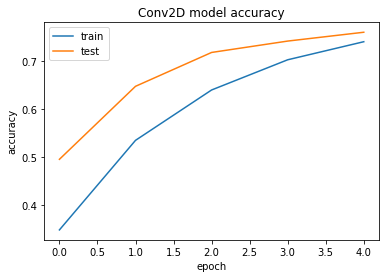

In [45]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Conv2D model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.show()
plt.savefig('2DCNN_Accuracy_plot.pdf')  


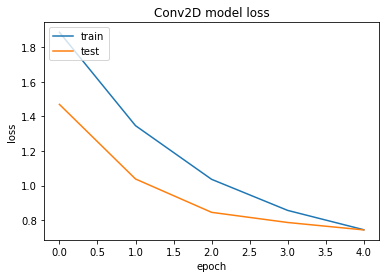

In [46]:
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Conv2D model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.show()
plt.savefig('2DCNN_loss_plot.pdf') 

## **ConvLSTM 2D model creation and test :**

In [49]:
x_train = X_train.reshape(72171, 1, 80, 3, 1)
x_test = X_test.reshape(18043, 1, 80, 3, 1)

In [50]:
x_train.shape

(72171, 1, 80, 3, 1)

In [51]:
x_train[0].shape

(1, 80, 3, 1)

In [54]:
model2 = Sequential()
model2.add(ConvLSTM2D(128,(2,2), activation = 'relu', input_shape =  x_train[0].shape, return_sequences = True))
model2.add(Dropout(0.1))

model2.add(ConvLSTM2D(256, (2,2) ,activation = 'relu'))
model2.add(Dropout(0.2))

model2.add(Flatten())

model2.add(Dense(512, activation = 'relu'))
model2.add(Dropout(0.5))

model2.add(Dense(18, activation='softmax'))

model2.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) 

history1 = model2.fit(x_train, 
                    y_train, 
                    epochs = 5, 
                    # batch_size=256,
                    validation_data=(x_test, y_test),
                    # validation_batch_size=256,
                    verbose=1 )

y_pred2 = model2.predict(x_test)

Epoch 1/5
2256/2256 [==============================] - 286s 124ms/step - loss: 2.0096 - accuracy: 0.3029 - val_loss: 1.6929 - val_accuracy: 0.4230
Epoch 2/5
2256/2256 [==============================] - 276s 122ms/step - loss: 1.6583 - accuracy: 0.4202 - val_loss: 1.4476 - val_accuracy: 0.4964
Epoch 3/5
2256/2256 [==============================] - 279s 123ms/step - loss: 1.4390 - accuracy: 0.4937 - val_loss: 1.1713 - val_accuracy: 0.6184
Epoch 4/5
2256/2256 [==============================] - 280s 124ms/step - loss: 1.2689 - accuracy: 0.5528 - val_loss: 1.0170 - val_accuracy: 0.6609
Epoch 5/5
564/564 [==============================] - 17s 29ms/step


In [55]:
# model2.save('cnn_lstm_model.h5')

In [56]:
#Converting predictions to label
pred = list()
for i in range(len(y_pred2)):
    pred.append(np.argmax(y_pred2[i]))

#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
print("the accuracy is",accuracy_score(pred,y_test)*100,"%")

the accuracy is 70.90838552347171 %


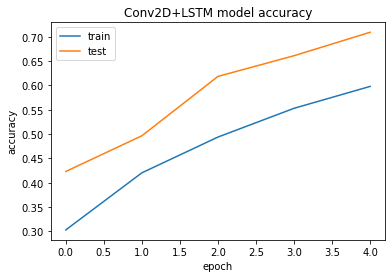

In [57]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Conv2D+LSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.show()
plt.savefig('2DCNN_LSTM_Accuracy_plot.pdf')  


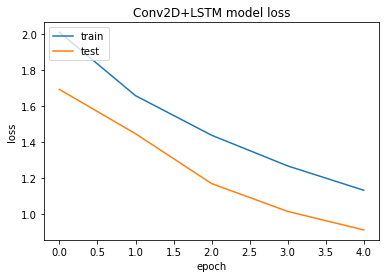

In [58]:
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Conv2D+LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.show()
plt.savefig('2DCNN_LSTM_loss_plot.pdf') 

In [130]:
X_train, X_test, y_train, y_test = train_test_split(Data, y, 
                                                    train_size = 0.90, 
                                                    test_size = 0.10,
                                                    random_state=42)
y_train.shape

(81192,)

K Neighbours Classifier

In [153]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)


In [154]:
y_pred_knn = KNN.predict(X_test)

In [155]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88       550
           1       1.00      0.81      0.90       489
           2       0.68      0.15      0.25       455
           3       0.68      0.85      0.75       492
           4       0.45      0.88      0.59       544
           5       0.69      0.81      0.74       459
           6       0.64      0.76      0.69       528
           7       0.65      0.78      0.71       504
           8       0.71      0.78      0.74       522
           9       0.64      0.70      0.67       458
          10       0.67      0.83      0.74       558
          11       0.67      0.83      0.74       510
          12       0.57      0.08      0.14       528
          13       0.45      0.32      0.37       501
          14       0.57      0.23      0.32       543
          15       0.72      0.77      0.74       457
          16       0.57      0.67      0.62       441
          17       0.43    

Random Forest Classifier

In [136]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(30,random_state=100).fit(X_train, y_train)
y_pred_rf = RF.predict(X_test)

In [137]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.64      0.90      0.75       550
           1       0.79      0.97      0.87       489
           2       0.49      0.52      0.51       455
           3       0.86      0.89      0.87       492
           4       0.83      0.83      0.83       544
           5       0.87      0.86      0.86       459
           6       0.83      0.83      0.83       528
           7       0.84      0.82      0.83       504
           8       0.81      0.83      0.82       522
           9       0.82      0.77      0.80       458
          10       0.86      0.81      0.83       558
          11       0.88      0.82      0.85       510
          12       0.50      0.42      0.46       528
          13       0.58      0.59      0.59       501
          14       0.58      0.45      0.51       543
          15       0.87      0.84      0.85       457
          16       0.85      0.84      0.84       441
          17       0.70    

In [161]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_lr = LR.predict(X_test)

In [162]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.09      0.19      0.13       550
           1       0.19      0.22      0.20       489
           2       0.06      0.12      0.08       455
           3       0.00      0.00      0.00       492
           4       0.13      0.26      0.17       544
           5       0.00      0.00      0.00       459
           6       0.06      0.07      0.07       528
           7       0.03      0.00      0.01       504
           8       0.13      0.38      0.19       522
           9       0.10      0.00      0.01       458
          10       0.06      0.03      0.04       558
          11       0.12      0.28      0.17       510
          12       0.12      0.13      0.13       528
          13       0.14      0.07      0.09       501
          14       0.14      0.09      0.11       543
          15       0.10      0.05      0.06       457
          16       0.03      0.01      0.01       441
          17       0.00    